$$ Name :: Sudhir Sharma $$
$$ Assignment6$$
$$ 12041500 $$



# Task 1: Learn to generate a doodle given an input vector (encoding) of 5 dimensions. Are 5 dimensions enough to produce good-quality doodles? If not, increase the dimensionality till you get good re-constructions.

# Part A

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint 
import pandas as pd
import keras
from tqdm import tqdm
from sklearn import metrics
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocess import PolynomialFeatures
from sklearn.preprocess import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocess import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn import neighbors
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocess import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.losses import MeanSquaredError 
from keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.random import set_seed
from keras.models import Sequential, Model
from keras.layers import Input, Dense, BatchNormalization, Dropout, Flatten
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D, Reshape, Flatten
from keras.layers import ELU, PReLU, LeakyReLU
from keras.optimizers import Adam, SGD
from keras.initializers import RandomNormal
from keras.backend import clear_session
np.random.seed(0)
import tensorflow as tf
import tensorflow.keras.backend as K

In [12]:
from google.colab import files
%matplotlib inline

In [13]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [14]:
def take_data(name) :    # function to get the data set uploaded in the drive.   
   PATH = '/content/gdrive/My Drive/DataSet/'
   PATH = PATH+name+'.npy'
   return np.load(PATH) 

In [6]:
bus_doodles = np.load('/content/gdrive/My Drive/DataSet/bus.npy') # imported bus data from drive

In [15]:

def randomize (arr, n):
    for i in range(n-1,0,-1):
        j = randint(0,i+1)
        arr[i],arr[j] = arr[j],arr[i]
    return arr
def plot_image(image):
 plt.imshow(image, cmap="binary")
 plt.axis("on")
def show_reconstructions(model, n_images , X_valid):
 reconstructions = model.predict(X_valid[:n_images])
 fig = plt.figure(figsize=(n_images * 1.5, 3))
 for image_index in range(n_images):
  plt.subplot(2, n_images, 1 + image_index)
  plot_image(X_valid[image_index].reshape(28,28))
  plt.subplot(2, n_images, 1 + n_images + image_index)
  plot_image(reconstructions[image_index])

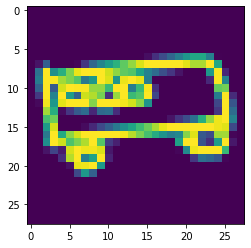

In [ ]:
X_train = (bus_doodles.astype(np.float32)/127.5) - 1. 
num_train = X_train.shape[0]
X_train = X_train.reshape(num_train, 28, 28, 1)
random_bus = X_train[np.random.randint(num_train-1)].reshape(28, 28)
random_bus = random_bus*127.5 + 1
plt.imshow(random_bus)   # ploting random bus data from data set

In [ ]:
num_train = X_train.shape[0]
X_train = X_train.reshape(num_train, 28, 28, 1)
X_train_valid=X_train[:int(0.1*len(X_train))]

In [ ]:
print(type (X_train) , type(X_train_valid))
print(len (X_train) , len(X_train_valid))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
166208 16620


In [16]:
class Sampling(keras.layers.Layer):
 def call(self, inputs):
  mean, log_var = inputs
  return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [38]:

def Model1(input1  , X_train , X_train_valid , n_epochs = 2) :
          codings_size = input1
          inputs = keras.layers.Input(shape=[28, 28])
          z = keras.layers.Flatten()(inputs)
          z = keras.layers.Dense(150, activation="selu")(z)
          z = keras.layers.Dense(100, activation="selu")(z)
          codings_mean = keras.layers.Dense(codings_size)(z) 
          logg_temp = keras.layers.Dense(codings_size)(z) 
          codings = Sampling()([codings_mean, logg_temp])
          encoder = keras.Model(
          inputs=[inputs], outputs=[codings_mean, logg_temp, codings])
          decoder_inputs = keras.layers.Input(shape=[codings_size])
          x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
          x = keras.layers.Dense(150, activation="selu")(x)
          x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
          outputs = keras.layers.Reshape([28, 28])(x)  
          decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])
          _ , _, codings = encoder(inputs)
          reconstructions = decoder(codings)
          variational_ae = keras.Model(inputs=[inputs], outputs=[reconstructions])
          latent_loss = -0.5 * K.sum(
          1 + logg_temp - K.exp(logg_temp) - K.square(codings_mean),
          axis=-1)
          variational_ae.add_loss(K.mean(latent_loss) / 784.)
          variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop")
          history = variational_ae.fit(X_train, X_train, epochs= n_epochs, batch_size=128,validation_data=[X_train_valid, X_train_valid]) 
          return variational_ae


## ## For generating a doodle of given input vector ( input 1) we need to create a model1

In [ ]:
model = Model1(5 ,X_train  ,X_train_valid )


Epoch 1/2
1299/1299 [==============================] - 25s 18ms/step - loss: -9.7087 - val_loss: -10.0285
Epoch 2/2
1299/1299 [==============================] - 23s 18ms/step - loss: -10.1152 - val_loss: -10.1505


In [ ]:
model.summary() # checking the summaary of the model

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 model (Functional)             [(None, 5),          133860      ['input_1[0][0]']                
                                 (None, 5),                                                       
                                 (None, 5)]                                                       
                                                                                                  
 model_1 (Functional)           (None, 28, 28)       134134      ['model[0][2]']                  
                                                                                            

1/1 [==============================] - 0s 211ms/step


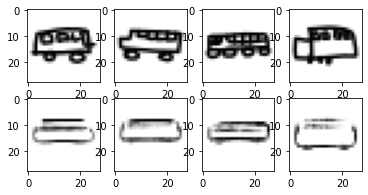

In [ ]:
show_reconstructions(model , 4 , X_train_valid) 

## need to increase the dimension so we have made it twice

In [ ]:
model_bus_10 = Model1( 10  ,X_train  ,X_train_valid )

Epoch 1/2
1299/1299 [==============================] - 25s 18ms/step - loss: -9.7219 - val_loss: -10.1035
Epoch 2/2
1299/1299 [==============================] - 23s 18ms/step - loss: -10.2153 - val_loss: -10.2788


1/1 [==============================] - 0s 148ms/step


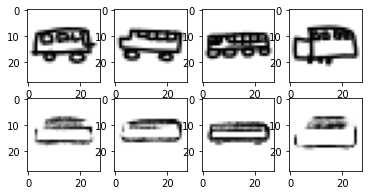

In [ ]:
show_reconstructions(model_bus_10 , 4 , X_train_valid)

In [ ]:
model_bus_25 = Model1( 25  ,X_train  ,X_train_valid )

Epoch 1/2
1299/1299 [==============================] - 26s 19ms/step - loss: -9.8059 - val_loss: -10.1858
Epoch 2/2
1299/1299 [==============================] - 26s 20ms/step - loss: -10.2988 - val_loss: -10.3876


1/1 [==============================] - 0s 153ms/step


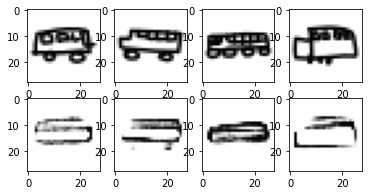

In [ ]:
show_reconstructions(model_bus_25 , 4 , X_train_valid)

## As the image quality is increase we need to increase dimension also

In [ ]:
model_bus_75 = Model1( 75  ,X_train  ,X_train_valid )

Epoch 1/2
1299/1299 [==============================] - 27s 20ms/step - loss: -9.8068 - val_loss: -10.1426
Epoch 2/2
1299/1299 [==============================] - 25s 19ms/step - loss: -10.2662 - val_loss: -10.3398


1/1 [==============================] - 0s 157ms/step


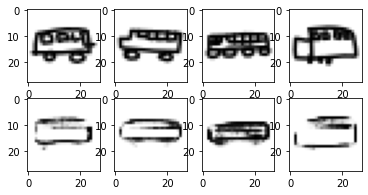

In [ ]:
show_reconstructions(model_bus_75 , 4 , X_train_valid)

In [ ]:
model_bus_50 = Model1( 50  ,X_train  ,X_train_valid )

Epoch 1/2
1299/1299 [==============================] - 26s 19ms/step - loss: -9.8461 - val_loss: -10.2003
Epoch 2/2
1299/1299 [==============================] - 26s 20ms/step - loss: -10.3150 - val_loss: -10.4170


1/1 [==============================] - 0s 150ms/step


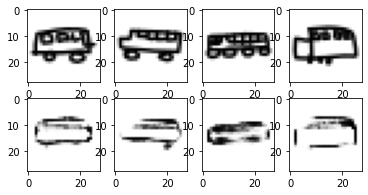

In [ ]:
show_reconstructions(model_bus_50 , 4 , X_train_valid)

## Testing on different dimentions

In [ ]:
model_bus_100 = Model1( 100  ,X_train  ,X_train_valid )

Epoch 1/2
1299/1299 [==============================] - 27s 20ms/step - loss: -9.7882 - val_loss: -10.1344
Epoch 2/2
1299/1299 [==============================] - 25s 20ms/step - loss: -10.2465 - val_loss: -10.3360


1/1 [==============================] - 0s 158ms/step


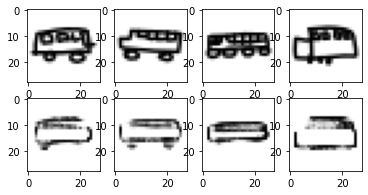

In [ ]:
show_reconstructions(model_bus_100 , 4 , X_train_valid)

In [ ]:
model_bus_200 = Model1( 200  ,X_train  ,X_train_valid )

Epoch 1/2
1299/1299 [==============================] - 30s 22ms/step - loss: -9.7132 - val_loss: -10.0507
Epoch 2/2
1299/1299 [==============================] - 28s 22ms/step - loss: -10.1664 - val_loss: -10.2652


1/1 [==============================] - 0s 19ms/step


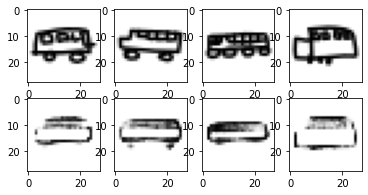

In [ ]:
show_reconstructions(model_bus_100 , 4 , X_train_valid)

In [25]:
def preprocess(Data) : 
      doodles = Data 
      X_train = (doodles.astype(np.float32)/127.5) - 1. #normalize to be [-1,1]
      num_train = X_train.shape[0] 
       
      X_train = X_train.reshape(num_train, 28, 28, 1)
      X_valid=X_train[:int(0.1*len(X_train))]
      random_bus = X_train[0].reshape(28, 28)
      if num_train  > 1 : 
        random_bus = X_train[np.random.randint(num_train-1)].reshape(28, 28)
      random_bus = random_bus*127.5 + 1
      plt.imshow(random_bus) #a wild random cat appears
      num_train = X_train.shape[0]
      X_train = X_train.reshape(num_train, 28, 28, 1)
      # print(type(X_train),type(X_train_valid))
      X_train_valid=X_train[:int(0.1*len(X_train))] 
      return (X_train , X_train_valid)
            

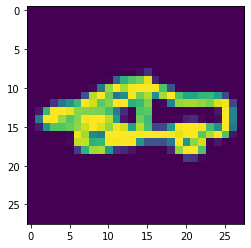

In [ ]:
data = take_data('car')
x_train , x_train_valid = preprocess(data) 


In [ ]:

model_car_100  = Model1(100 , x_train , x_train_valid)

Epoch 1/2
1428/1428 [==============================] - 30s 20ms/step - loss: -10.4264 - val_loss: -10.6044
Epoch 2/2
1428/1428 [==============================] - 39s 27ms/step - loss: -10.6890 - val_loss: -10.8065


1/1 [==============================] - 0s 137ms/step


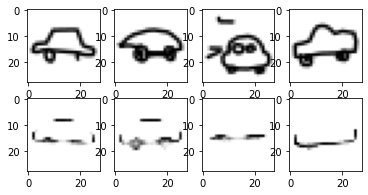

In [ ]:
show_reconstructions(model_car_100 , 4 , x_train_valid)

# Testing of aircraft data set

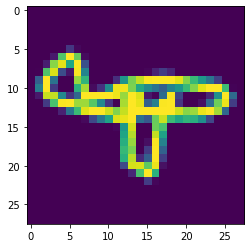

In [ ]:
data = take_data('aircraft')
x_train , x_train_valid = preprocess(data) 

In [ ]:

model_aircraft_100  = Model1(500 , x_train , x_train_valid)

Epoch 1/2
1185/1185 [==============================] - 33s 27ms/step - loss: -10.4895 - val_loss: -10.6781
Epoch 2/2
1185/1185 [==============================] - 31s 26ms/step - loss: -10.7788 - val_loss: -10.8944


1/1 [==============================] - 0s 152ms/step


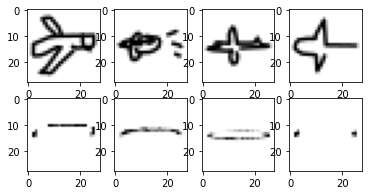

In [ ]:
show_reconstructions(model_aircraft_100 , 4 , x_train_valid)

# Models for Trucks

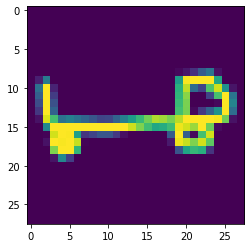

In [ ]:
data = take_data('truck')
x_train , x_train_valid = preprocess(data) 

In [ ]:

model_trucks_100  = Model1(100 , x_train , x_train_valid , 15)

Epoch 1/15
1027/1027 [==============================] - 25s 23ms/step - loss: -10.3472 - val_loss: -10.5717
Epoch 2/15
1027/1027 [==============================] - 21s 21ms/step - loss: -10.6326 - val_loss: -10.6994
Epoch 3/15
1027/1027 [==============================] - 21s 20ms/step - loss: -10.7480 - val_loss: -10.7848
Epoch 4/15
1027/1027 [==============================] - 21s 20ms/step - loss: -10.8364 - val_loss: -10.8637
Epoch 5/15
1027/1027 [==============================] - 21s 20ms/step - loss: -10.9056 - val_loss: -10.9243
Epoch 6/15
1027/1027 [==============================] - 21s 21ms/step - loss: -10.9646 - val_loss: -10.9985
Epoch 7/15
1027/1027 [==============================] - 23s 22ms/step - loss: -11.0340 - val_loss: -11.0573
Epoch 8/15
1027/1027 [==============================] - 21s 20ms/step - loss: -11.0974 - val_loss: -11.1196
Epoch 9/15
1027/1027 [==============================] - 21s 20ms/step - loss: -11.1406 - val_loss: -11.1317
Epoch 10/15
1027/1027 [=====

3/3 [==============================] - 0s 6ms/step


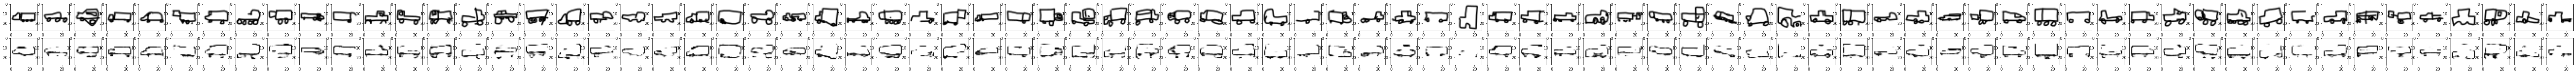

In [ ]:
show_reconstructions(model_trucks_100 , 80 , x_train_valid)

# Models for bicycle

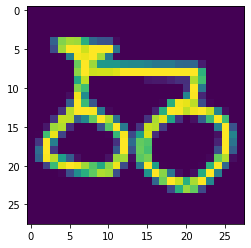

In [ ]:
data = take_data('bicycle')
x_train , x_train_valid = preprocess(data) 

In [ ]:

model_bicycle_100  = Model1(100 , x_train , x_train_valid)

Epoch 1/2
989/989 [==============================] - 22s 21ms/step - loss: -10.1822 - val_loss: -10.4328
Epoch 2/2
989/989 [==============================] - 21s 21ms/step - loss: -10.5006 - val_loss: -10.5884


1/1 [==============================] - 0s 213ms/step


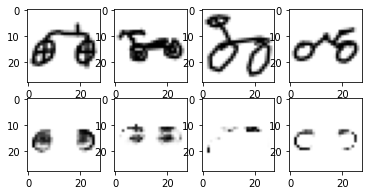

In [ ]:
show_reconstructions(model_bicycle_100 , 4 , x_train_valid)

# Task 2: Generate a doodle that is a mixture of categories using interpolation. Generate multiple images of various combinations (at least 5) such as 

# Genrating images for multiple data set

In [65]:
def mix_data(DataSet1 , DataSet2) : 
        DataSet1 =  list(DataSet1)
        DataSet2 =  list(DataSet2) 
        DataSet2  = randomize(DataSet2 , len(DataSet2))
        for i in DataSet2 : 
             DataSet1.append(i)
        return np.array(randomize(DataSet1 , len(DataSet1))) 

In [45]:

def  MeanImageGenerator( X_train , X_train_valid ,X_train_ , X_train_valid_  , n = 1 ) :
          mean = []
          while n :
            num_train = X_train.shape[0] 
            random_bus1 = X_train[np.random.randint(num_train-1)].reshape(28, 28)
            num_train = X_train.shape[0] 
            random_bus2 = X_train_[np.random.randint(num_train-1)].reshape(28, 28) 
            mean .append((random_bus1+random_bus2)/2)
            n-=1
          return mean
      

          


In [21]:
import pandas as pd

## Generating images from car and aircraft

Epoch 1/5
2613/2613 [==============================] - 49s 18ms/step - loss: -10.6579 - val_loss: -10.9199
Epoch 2/5
2613/2613 [==============================] - 50s 19ms/step - loss: -11.0377 - val_loss: -11.0875
Epoch 3/5
2613/2613 [==============================] - 52s 20ms/step - loss: -11.1391 - val_loss: -11.1619
Epoch 4/5
2613/2613 [==============================] - 45s 17ms/step - loss: -11.1897 - val_loss: -11.1980
Epoch 5/5
2613/2613 [==============================] - 45s 17ms/step - loss: -11.2210 - val_loss: -11.2204


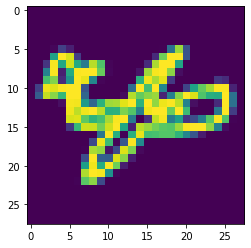

In [66]:

data1 = take_data('car')
data2 = take_data('aircraft')
Mixed_DataSet = mix_data(data1 , data2)
X_train , X_train_valid = preprocess(data1) 
X_train_ , X_train_valid_ = preprocess(data2)
reconstruct1 = MeanImageGenerator( X_train , X_train_valid ,X_train_ , X_train_valid_)
Mixed_DataSet_train   , Mixed_Dataset_valid =  preprocess(Mixed_DataSet)
mix_airplane_car = Model1(100  , Mixed_DataSet_train , Mixed_Dataset_valid , 5)



In [ ]:
print(reconstruct1)

1/1 [==============================] - 0s 21ms/step


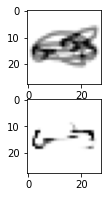

In [72]:
X_train = np.array(reconstruct1)
show_reconstructions(mix_airplane_car , 1 , X_train)

## Generating images from trucks and bus

In [ ]:
data1 = take_data('truck')
data2 = take_data('bus')
Mixed_DataSet = mix_data(data1 , data2)
X_train , X_train_valid = preprocess(data1) 
X_train_ , X_train_valid_ = preprocess(data2)
reconstruct1 = MeanImageGenerator( X_train , X_train_valid ,X_train_ , X_train_valid_  ,5 )
Mixed_DataSet_train   , Mixed_Dataset_valid =  preprocess(Mixed_DataSet)
mix_truck_bus = Model1(100  , Mixed_DataSet_train , Mixed_Dataset_valid , 5)

In [ ]:
X_train = np.array(reconstruct1)
show_reconstructions(mix_truck_bus , 5 , X_train)

## Generating images from cars and bicycle

In [ ]:
data1 = take_data('car')
data2 = take_data('bicycle')
Mixed_DataSet = mix_data(data1 , data2)
X_train , X_train_valid = preprocess(data1) 
X_train_ , X_train_valid_ = preprocess(data2)
reconstruct1 = MeanImageGenerator( X_train , X_train_valid ,X_train_ , X_train_valid_ , 5)
Mixed_DataSet_train   , Mixed_Dataset_valid =  preprocess(Mixed_DataSet)
mix_car_cycle = Model1(100  , Mixed_DataSet_train , Mixed_Dataset_valid , 5)

In [ ]:
X_train = np.array(reconstruct1)
show_reconstructions(mix_car_cycle , 5 , X_train)

## Generating images from aircrafts and bus

In [ ]:
data1 = take_data('aircraft')
data2 = take_data('bus')
Mixed_DataSet = mix_data(data1 , data2)
X_train , X_train_valid = preprocess(data1) 
X_train_ , X_train_valid_ = preprocess(data2)
reconstruct1 = MeanImageGenerator( X_train , X_train_valid ,X_train_ , X_train_valid_ , 5)
Mixed_DataSet_train   , Mixed_Dataset_valid =  preprocess(Mixed_DataSet)
mix_truck_bus = Model1(100  , Mixed_DataSet_train , Mixed_Dataset_valid , 5)

In [ ]:
X_train = np.array(reconstruct1)
show_reconstructions(mix_car_cycle , 5 , X_train)

## Generating images from bicycle and aircraft

In [ ]:
data1 = take_data('aircraft')
data2 = take_data('bicycle')
Mixed_DataSet = mix_data(data1 , data2)
X_train , X_train_valid = preprocess(data1) 
X_train_ , X_train_valid_ = preprocess(data2)
reconstruct1 = MeanImageGenerator( X_train , X_train_valid ,X_train_ , X_train_valid_ , 5)
Mixed_DataSet_train   , Mixed_Dataset_valid =  preprocess(Mixed_DataSet)
mix_truck_bus = Model1(100  , Mixed_DataSet_train , Mixed_Dataset_valid , 5)

In [ ]:
X_train = np.array(reconstruct1)
show_reconstructions(mix_car_cycle , 5 , X_train)

## Task 3: Build an interactive feature where the user can instruct/input what type of doodle he wants to design using these categories. 

In [136]:
def  meanImg( data1  , data2  , data3  , data4   , data5 ) :
          mean = []
          n = 5
          data = [data1  , data2  , data3  , data4   , data5 ] 
          index  =  0 
          max_len = 0
          j = 0 
          for  i in data : 
            if(len(i) > max_len):  
                max_len =  max(max_len , len(i))
                index =  j
            j+=1 
          mean = data[index]
          j = 0 ; 
          mean  = np.array(mean)
          arr = []
          for i in mean  : 
              arr.append(mean[j].reshape(28 , 28)) 
              j+=1 
          j = 0 
          mean =  arr
          for  i in data  : 
               l = 0
               if(j ==  index) : 
                   continue 
               for k in i  :   
                   mean[l] = mean[l] + k.reshape(28 , 28)
                   l+=1
               j+=1
               mean = randomize(list(mean) , len(mean)) 
               mean  = np.array(mean)
          return mean
                  
                           
       

In [137]:
def fake_data(DataSet , n) : 
    temp = randomize(list(DataSet) , len(DataSet)) 
    return temp[ : int(len(DataSet) *(n/100))]


In [138]:
def GAN(DataSet , n) : 
    temp = randomize(list(DataSet) , len(DataSet)) 
    return temp[ : int(1000*(n/100))]

In [139]:
def dataSet(car , aircraft  , bicycle , bus  , truck ): 
       data1 = take_data('car')
       data2 = take_data('aircraft')
       data3 = take_data('bicycle')
       data4 = take_data('bus')
       data5 = take_data('truck')  
        

       temp = fake_data(  list (data1) ,   car) 
       temp += fake_data( list (data2) , aircraft)
       temp += fake_data( list (data3), bicycle)
       temp += fake_data( list (data4) , truck)
       temp += fake_data( list (data5) , bus) 
       temp = randomize(temp , len(temp))
       
       
       data1  = list(data1)
       data2  = list(data2)
       data3  = list(data3)
       data4  = list(data4)
       data5  = list(data5)
       
       data1 = GAN(data1 , car)
       data2 = GAN(data2 , aircraft)
       data3 = GAN(data3 , bicycle)
       data4  = GAN(data4 , truck)
       data5  = GAN(data5 , bus)

       data1  , _  = preprocess(np.array(data1))
       data2  , _  = preprocess(np.array(data2))
       data3  , _  = preprocess(np.array(data3))
       data4  , _  = preprocess(np.array(data4))
       data5  , _  = preprocess(np.array(data5)) 
       

       print(type(data1))
       

       randomImage =  meanImg( data1 ,data2 ,data3 ,data4 , data5 )

       
       return np.array(temp)  , randomImage

In [143]:
def Doodle(Data , images):  
      print(len(Data))
      Mixed_DataSet_train   , Mixed_Dataset_valid =  preprocess(Data)
      mix_ = Model1(100  , Mixed_DataSet_train , Mixed_Dataset_valid , 5) 
      X_train = np.array(images)
      show_reconstructions(mix_ , 5 , X_train)

---------Hi ^v^ Lets Doodle SomeThing---------------
How much your Doodle Should Have Bus like feature ->10
How much your Doodle Should Have aircraft like feature ->10
How much your Doodle Should Have truck  like feature ->20
How much your Doodle Should Have car like feature ->30
How much your Doodle Should Have bicycle like feature ->30
<class 'numpy.ndarray'>
154325
Epoch 1/5
1206/1206 [==============================] - 27s 20ms/step - loss: -10.1567 - val_loss: -10.3573
Epoch 2/5
1206/1206 [==============================] - 24s 20ms/step - loss: -10.4789 - val_loss: -10.5950
Epoch 3/5
1206/1206 [==============================] - 24s 20ms/step - loss: -10.6621 - val_loss: -10.7364
Epoch 4/5
1206/1206 [==============================] - 24s 20ms/step - loss: -10.7748 - val_loss: -10.8186
Epoch 5/5
1/1 [==============================] - 0s 151ms/step


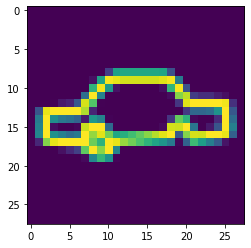

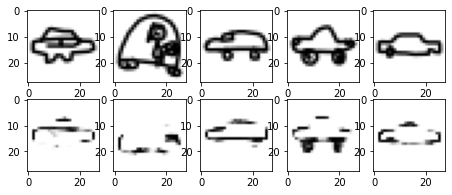

In [144]:
print("---------Hi ^v^ Lets Doodle SomeThing---------------")
bus = input("How much your Doodle Should Have Bus like feature ->")
aircraft = input("How much your Doodle Should Have aircraft like feature ->")
truck = input("How much your Doodle Should Have truck  like feature ->")
car = input("How much your Doodle Should Have car like feature ->")
bicycle = input("How much your Doodle Should Have bicycle like feature ->")
DataSet , images =  dataSet(int(car) ,int(aircraft)  ,int (bicycle) , int(bus)  ,int( truck) )
Doodle(DataSet , images)
